[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.5 W.E.B. Windkraft

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *

import FLUCCOplus.web as web

FLUCCOplus.config  loaded!
FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:

df_web = pd.read_csv("../data/web/WEB-Lastgaenge_03032020_15min_kWh.csv",
                     delimiter=";",
                     index_col="Datetime UCT",
                     parse_dates=True)

In [5]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321320 entries, 2011-01-01 00:15:00 to 2020-01-03 00:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UTCOffset     181060 non-null  float64
 1   Datetime CET  321320 non-null  object 
 2   Neuhof I      318532 non-null  float64
 3   Neuhof III    203712 non-null  float64
 4   Maustrenk     321308 non-null  float64
 5   STERN I       213308 non-null  float64
 6   STERN II      213307 non-null  float64
 7   STERN III     125766 non-null  float64
dtypes: float64(7), object(1)
memory usage: 22.1+ MB


In [6]:
df_web.head()

,UTCOffset,Datetime CET,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,,,
2011-01-01 00:15:00,NaN,01.01.2011 00:15,0.0,NaN,1203.0,NaN,NaN,NaN
2011-01-01 00:30:00,NaN,01.01.2011 00:30,0.0,NaN,1044.0,NaN,NaN,NaN
2011-01-01 00:45:00,NaN,01.01.2011 00:45,0.0,NaN,957.0,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,01.01.2011 01:00,0.0,NaN,1095.0,NaN,NaN,NaN
2011-01-01 01:15:00,NaN,01.01.2011 01:15,0.0,NaN,1095.0,NaN,NaN,NaN


In [7]:
df_web = web.read_web()

read_web took 0:00:31.847324


In [8]:
anlagen = ["Neuhof I", "Neuhof III", "Maustrenk",
           "STERN I", "STERN II", "STERN III"]



In [9]:
df_hourly = df_web.resample("H")

Angaben zu den Daten von Roman Prager (W.E.B.):
Die Windparks Neuhof befinden sich bei Parndorf. Neuhof I ist 2003 in Betrieb gegangen und war damals unser bester Windpark. Neuhof I besteht aus 9 Stück V80 2MW- Anlagen. Neuhof 2 ist 2005 in Betrieb gegangen, das sind 2x V90 2MW- Anlagen. Neuhof III sind V112- Anlagen mit 3MW. Bei diesem Windpark sollte man erkennen können, wie durch den Zubau und die entsprechende Abschattung Neuhof I spezifisch schlechter wird.

Maustrenk ist ein ziemlich freistehender Windpark im Weinviertel, bestehend aus 6x V90 2MW. 2010 ist eine 7. Anlage dazugekommen.

Sternwind I II und III sind drei Ausbaustufen des Windparks Sternwald in Oberösterreich. Diese verhalten sich wesentlich anders als die Windparks in Ostösterreich und könnten daher interessant sein.



# TODO: Try dask here!!
https://www.youtube.com/watch?v=4WUgRpl-j7Y&list=PLYx7XA2nY5GfdAFycPLBdUDOUtdQIVoMf&index=55&t=0s

<div class="alert alert-info alert-block">dasd</div>

also,
# Structural time seris
https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand.ipynb

https://www.youtube.com/watch?v=v5ijNXvlC5A&list=PLYx7XA2nY5GcDQblpQ_M1V3PQPoLWiDAC&index=41&t=0s

state space models
* filtering
* smoothing?
* predicting

https://en.wikipedia.org/wiki/Kalman_filter

time series feature generation:
* max
* Number peaks

und hier gehts weiter
https://www.youtube.com/watch?v=IWv6EZGa4zo&list=PLYx7XA2nY5GcDQblpQ_M1V3PQPoLWiDAC&index=95&t=0s




In [10]:
df_power_MW = df_web[anlagen] * 4 / 1000

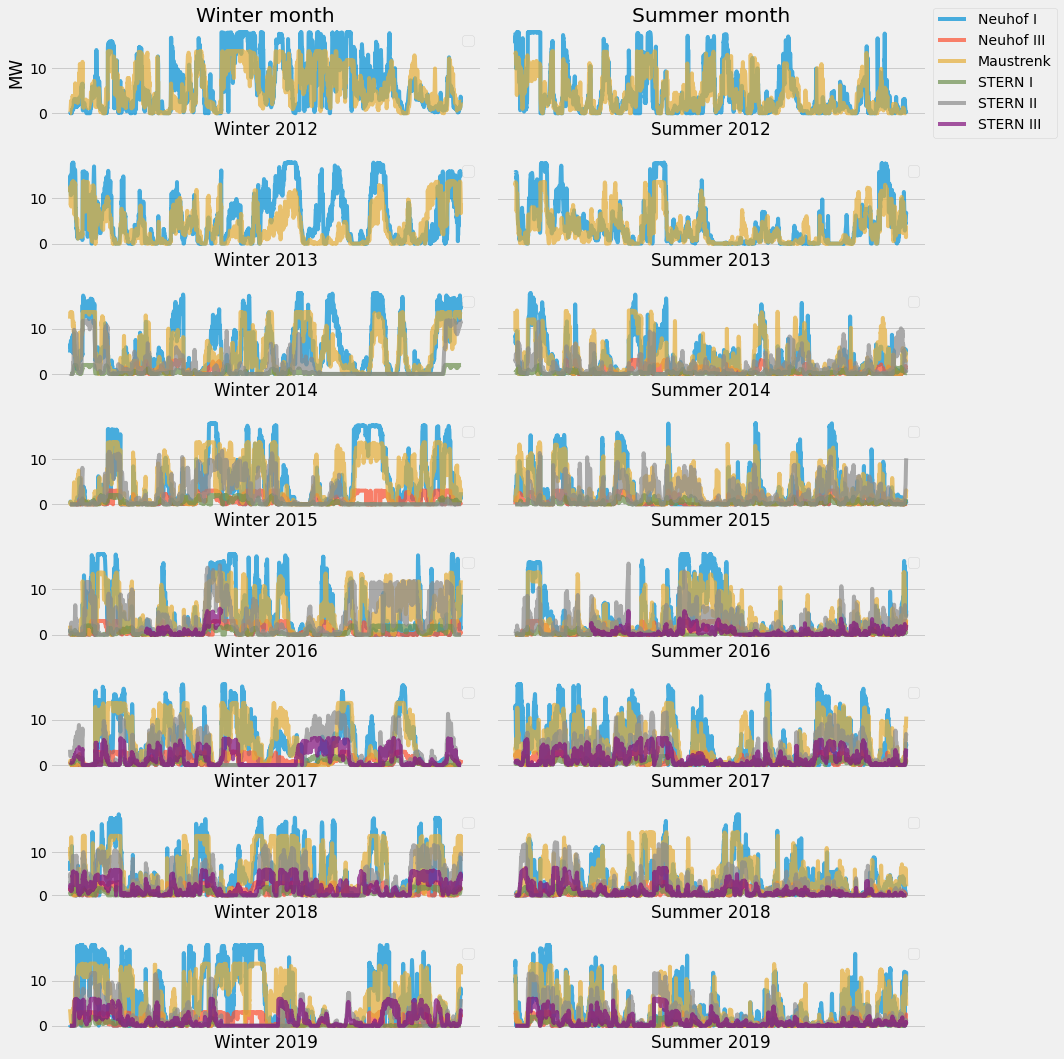

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
years = ["2012","2013", "2014","2015","2016","2017","2018","2019"]
fig, axes = plt.subplots(len(years), 2, figsize=(15, 15))
#df_yearly[anlagen].plot(kind="bar")
for i, y in enumerate(years):
    for windpark in anlagen:

        df_power_MW.loc[y+"-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])

        df_power_MW.loc[y+"-7", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i,1])
        axes[i,0].legend("");
        axes[i,1].legend("");
        axes[i,0].set(xlabel="Winter "+y)
        axes[i,1].set(xlabel="Summer "+y)

axes[0,-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0,1].set(title="Summer month", ylabel="")
axes[0,0].set(title="Winter month", ylabel="MW")
fig.tight_layout()

### Jahresdauerlinien

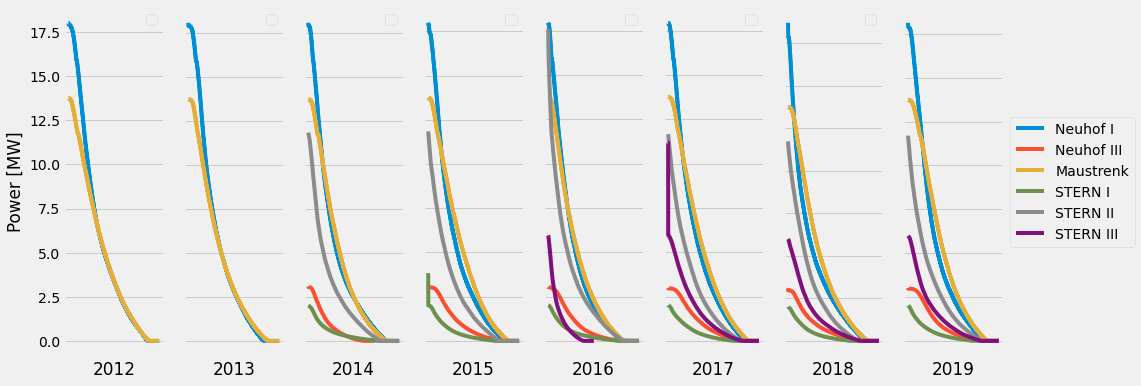

In [12]:
years = ["2012","2013", "2014","2015","2016","2017","2018","2019"]
fig, ax = plt.subplots(1,len(years), figsize=(15, 6))
for i, y in enumerate(years):
    for windpark in anlagen:
        df_power_MW.loc[y, [windpark]].sort_values(by=windpark,ascending=False).reset_index(drop=True).plot(ax=ax[i],xticks=[], sharey=True);
        ax[i].legend("");
        ax[i].set(ylabel="Power [MW]", xlabel=y);

ax[-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


# BOSS
Bag of Fast Fourier Symbols
[Source](https://pyts.readthedocs.io/en/latest/auto_examples/transformation/plot_boss.html#sphx-glr-auto-examples-transformation-plot-boss-py)

In [13]:
from pyts.datasets import load_gunpoint
from pyts.transformation import BOSS

# Toy dataset
X_train, _, y_train, _ = load_gunpoint(return_X_y=True)

# BOSS transformation
boss = BOSS(word_size=2, n_bins=4, window_size=12, sparse=False)
X_boss = boss.fit_transform(X_train)

# Visualize the transformation for the first time series
plt.figure(figsize=(6, 4))
vocabulary_length = len(boss.vocabulary_)
width = 0.3
plt.bar(np.arange(vocabulary_length) - width / 2, X_boss[y_train == 1][0],
        width=width, label='First time series in class 1')
plt.bar(np.arange(vocabulary_length) + width / 2, X_boss[y_train == 2][0],
        width=width, label='First time series in class 2')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(boss.vocabulary_.get)(np.arange(X_boss[0].size)),
           fontsize=12)
y_max = np.max(np.concatenate([X_boss[y_train == 1][0],
                               X_boss[y_train == 2][0]]))
plt.yticks(np.arange(y_max + 1), fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequencies", fontsize=14)
plt.title("BOSS transformation", fontsize=16)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()









ModuleNotFoundError: No module named 'pyts'